 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE - Read file in as dataframe
whale_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Count Nulls...again...
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
# Check nulls...again
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Count Nulls....?
sp500_df.isnull().sum()

Close    0
dtype: int64

In [11]:
# Check Data Types
sp500_df['Close'].value_counts()

$2080.15    2
$2115.48    2
$2066.66    2
$1920.03    2
$2373.47    2
           ..
$2823.81    1
$1502.96    1
$2488.83    1
$1961.63    1
$1744.50    1
Name: Close, Length: 1639, dtype: int64

In [12]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [13]:
sp500_df.dtypes

Close    object
dtype: object

In [14]:
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [15]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [16]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [17]:
# Rename Column
sp500_daily_renamed = sp500_daily_returns.rename(columns={'Close': 'SP500'})
sp500_daily_renamed

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
dailyreturn_df = pd.concat([whale_df, algo_df, sp500_daily_renamed], axis="columns", join="inner")
dailyreturn_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

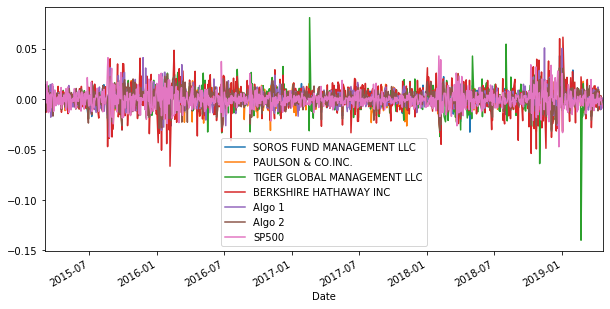

In [19]:
# Plot daily returns
dailyreturn_df.plot(figsize=(10, 5))

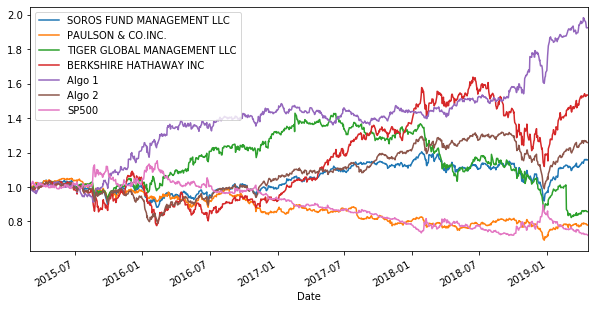

In [20]:
# Plot cumulative returns
cumulative_returns = (1 + dailyreturn_df).cumprod()
cumulative_returns.plot(figsize=(10,5))

In [21]:
print(f"Based on the Cumulative Returns, it looks like the S&P 500 is underperforming all stocks in this portfolio.")

Based on the Cumulative Returns, it looks like the S&P 500 is underperforming all stocks in this portfolio.


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

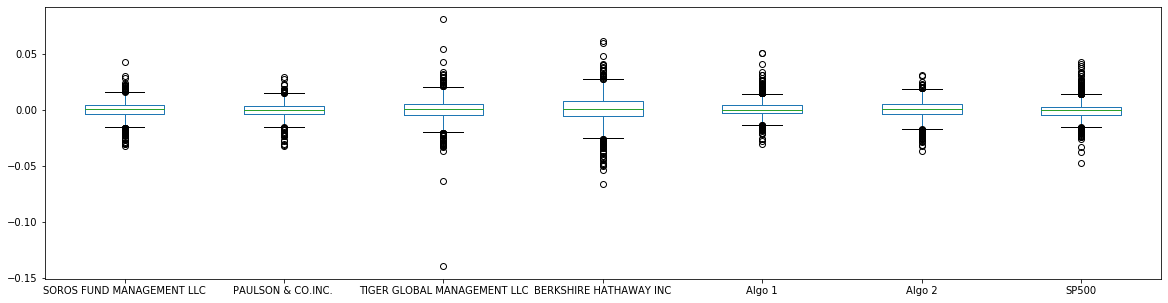

In [22]:
# Box plot to visually show risk
dailyreturn_df.plot.box(figsize=(20,5))

In [23]:
print(f"Paulson & Co. INC. appears to have the smallest spread, while Tiger Global MGMT appears to have the largest spread.")

Paulson & Co. INC. appears to have the smallest spread, while Tiger Global MGMT appears to have the largest spread.


In [24]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = dailyreturn_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P 500
daily_std_df = daily_std.sort_values(ascending=False)
daily_std_df.to_frame()
daily_std_df.loc[:"SP500"]

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500                          0.008587
dtype: float64

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500                          0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

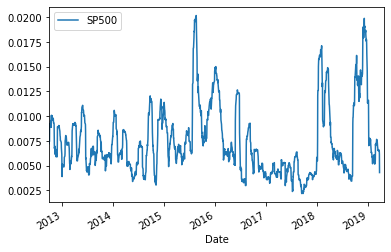

In [27]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_daily_renamed.rolling(window=21).std().plot()

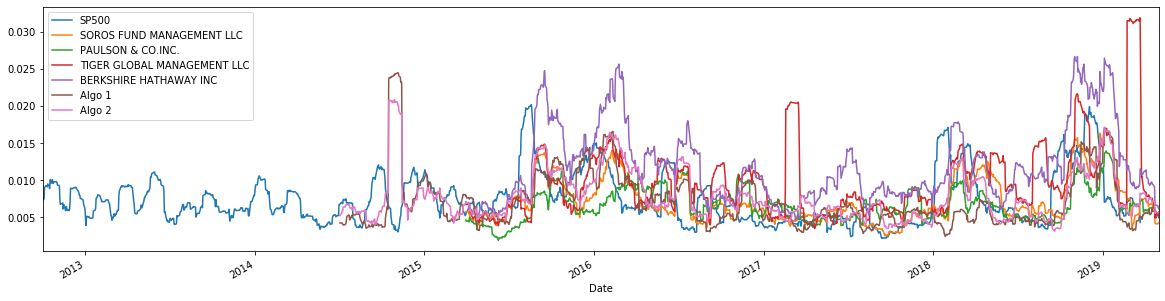

In [28]:
# Plot the rolling standard deviation of the firm's portfolios along with the rolling standard deviation of the S&P 500. Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
ax = sp500_daily_renamed.rolling(window=21).std().plot()
whale_df.rolling(window=21).std().plot(figsize=(20,5), ax = ax)
algo_df.rolling(window=21).std().plot(figsize=(20,5), ax = ax)

In [29]:
print(f"Returns appear to fluctuate across all portfolios at different times.")

Returns appear to fluctuate across all portfolios at different times.


In [30]:
# Correlation -- Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
correlation = dailyreturn_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


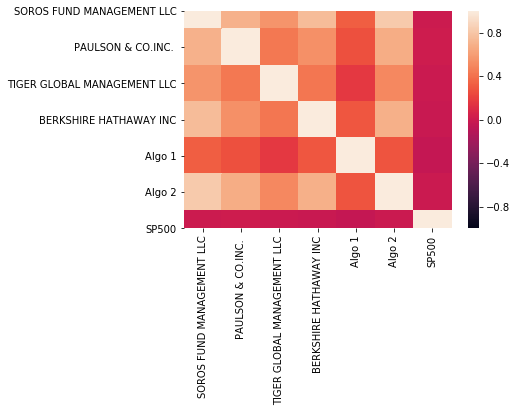

In [31]:
# Correlation -- Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [32]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
# Selecting Paulson in Whale for example
beta_df = dailyreturn_df.drop(columns=["SOROS FUND MANAGEMENT LLC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2"])
beta_df.head()


,PAULSON & CO.INC.,SP500
Date,,
2015-03-03,-0.004981,0.004408
2015-03-04,0.003241,-0.001195
2015-03-05,0.004076,0.014378
2015-03-06,-0.003574,-0.003929
2015-03-09,0.004225,0.017254


In [33]:
#Was getting a naming errors so I revamed for the covairance pull. I realize this is not best practice.
beta_df.columns = ['01', '02']

In [34]:
# Calculate covariance
covariance = beta_df['01'].cov(beta_df['02'])
covariance

8.173659005663558e-07

In [35]:
# Calculate vairance of Paulson & Co
variance = beta_df['01'].var()
variance

4.935786702352727e-05

In [36]:
# Calculate beta of all daily returns of Paul to SP500
paul_beta = covariance / variance
paul_beta

0.01655999235495214

In [37]:
print(f"The Beta for Paulson & Co. INC. is only {paul_beta} which is less than one indication that is moves less than the S&P500.")

The Beta for Paulson & Co. INC. is only 0.01655999235495214 which is less than one indication that is moves less than the S&P500.


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [38]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [39]:
# Annualzied Sharpe Ratios
sharpe_ratios = (dailyreturn_df.mean() * 252) / (dailyreturn_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

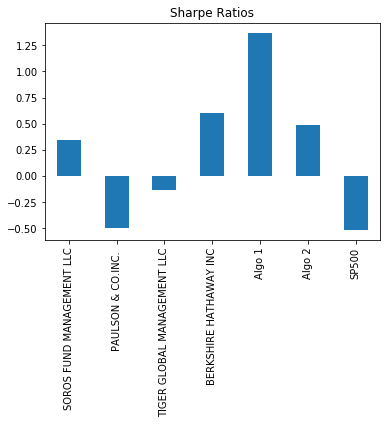

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [41]:
print(f"Based on Sharpe Raios, the Algo strategies are our performing both 'the marke' and the whales.")

Based on Sharpe Raios, the Algo strategies are our performing both 'the marke' and the whales.


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [42]:
# Read the first stock FACEBOOK
fb_csv = Path("Resources/FACEBOOK - Sheet1.csv")
# Read file in as dataframe
fb_df = pd.read_csv(fb_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
fb_df.head()

,Close
Date,
2019-01-02 16:00:00,135.68
2019-01-03 16:00:00,131.74
2019-01-04 16:00:00,137.95
2019-01-07 16:00:00,138.05
2019-01-08 16:00:00,142.53


In [43]:
fb_df = fb_df.rename(columns={'Close': 'FB'})
fb_df

,FB
Date,
2019-01-02 16:00:00,135.68
2019-01-03 16:00:00,131.74
2019-01-04 16:00:00,137.95
2019-01-07 16:00:00,138.05
2019-01-08 16:00:00,142.53
...,...
2020-04-09 16:00:00,175.19
2020-04-13 16:00:00,174.79
2020-04-14 16:00:00,178.17


In [44]:
# Read the second stock SAM
sam_csv = Path("Resources/SAM - Sheet1.csv")
# Read file in as dataframe
sam_df = pd.read_csv(sam_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sam_df.head()

,Close
Date,
2019-01-02 16:00:00,235.03
2019-01-03 16:00:00,234.74
2019-01-04 16:00:00,245.88
2019-01-07 16:00:00,244.51
2019-01-08 16:00:00,239.14


In [45]:
sam_df = sam_df.rename(columns={'Close': 'SAM'})
sam_df

,SAM
Date,
2019-01-02 16:00:00,235.03
2019-01-03 16:00:00,234.74
2019-01-04 16:00:00,245.88
2019-01-07 16:00:00,244.51
2019-01-08 16:00:00,239.14
...,...
2020-04-09 16:00:00,396.64
2020-04-13 16:00:00,386.34
2020-04-14 16:00:00,414.55


In [46]:
# Read the third stock HESAY
hesay_csv = Path("Resources/HESAY - Sheet1.csv")
# Read file in as dataframe
hesay_df = pd.read_csv(hesay_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
hesay_df.head()

,Close
Date,
2019-01-02 16:00:00,54.32
2019-01-03 16:00:00,53.01
2019-01-04 16:00:00,54.52
2019-01-07 16:00:00,54.28
2019-01-08 16:00:00,55.05


In [47]:
hesay_df = hesay_df.rename(columns={'Close': 'HESAY'})
hesay_df

,HESAY
Date,
2019-01-02 16:00:00,54.32
2019-01-03 16:00:00,53.01
2019-01-04 16:00:00,54.52
2019-01-07 16:00:00,54.28
2019-01-08 16:00:00,55.05
...,...
2020-04-09 16:00:00,71.21
2020-04-13 16:00:00,71.00
2020-04-14 16:00:00,74.12


In [48]:
# Concatenate all stocks into a single DataFrame
igw_portfolio = pd.concat([sam_df, fb_df, hesay_df], axis="columns", join="inner")
igw_portfolio

,SAM,FB,HESAY
Date,,,
2019-01-02 16:00:00,235.03,135.68,54.32
2019-01-03 16:00:00,234.74,131.74,53.01
2019-01-04 16:00:00,245.88,137.95,54.52
2019-01-07 16:00:00,244.51,138.05,54.28
2019-01-08 16:00:00,239.14,142.53,55.05
...,...,...,...
2020-04-09 16:00:00,396.64,175.19,71.21
2020-04-13 16:00:00,386.34,174.79,71.00
2020-04-14 16:00:00,414.55,178.17,74.12


In [49]:
# Reset the index
igw_wip = igw_portfolio.reset_index()
igw_wip['Date'] = pd.to_datetime(igw_wip['Date']).dt.date
igw_wip

,Date,SAM,FB,HESAY
0,2019-01-02,235.03,135.68,54.32
1,2019-01-03,234.74,131.74,53.01
2,2019-01-04,245.88,137.95,54.52
3,2019-01-07,244.51,138.05,54.28
4,2019-01-08,239.14,142.53,55.05
...,...,...,...,...
320,2020-04-09,396.64,175.19,71.21
321,2020-04-13,386.34,174.79,71.00
322,2020-04-14,414.55,178.17,74.12
323,2020-04-15,419.15,176.97,74.17


In [50]:
igw_df = igw_wip.set_index(['Date'])
igw_df

,SAM,FB,HESAY
Date,,,
2019-01-02,235.03,135.68,54.32
2019-01-03,234.74,131.74,53.01
2019-01-04,245.88,137.95,54.52
2019-01-07,244.51,138.05,54.28
2019-01-08,239.14,142.53,55.05
...,...,...,...
2020-04-09,396.64,175.19,71.21
2020-04-13,386.34,174.79,71.00
2020-04-14,414.55,178.17,74.12


In [51]:
# Drop Nulls
igw_df.dropna()

,SAM,FB,HESAY
Date,,,
2019-01-02,235.03,135.68,54.32
2019-01-03,234.74,131.74,53.01
2019-01-04,245.88,137.95,54.52
2019-01-07,244.51,138.05,54.28
2019-01-08,239.14,142.53,55.05
...,...,...,...
2020-04-09,396.64,175.19,71.21
2020-04-13,386.34,174.79,71.00
2020-04-14,414.55,178.17,74.12


In [52]:
#daily returns, drop nulls
igw_dailyreturn = igw_df.pct_change()
igw_dailyreturn

,SAM,FB,HESAY
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.001234,-0.029039,-0.024116
2019-01-04,0.047457,0.047138,0.028485
2019-01-07,-0.005572,0.000725,-0.004402
2019-01-08,-0.021962,0.032452,0.014186
...,...,...,...
2020-04-09,-0.001209,0.005221,0.015110
2020-04-13,-0.025968,-0.002283,-0.002949
2020-04-14,0.073019,0.019337,0.043944


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

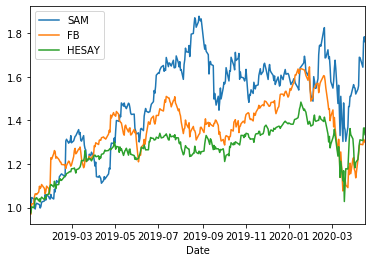

In [53]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# I have no idea what this is actually asking, but if we take a look at the three seperat cumulatively...
cumulative_returns = (1 + igw_dailyreturn).cumprod()
cumulative_returns.plot()

In [54]:
cumulative_returns.iloc[-1]

SAM      1.760669
FB       1.299012
HESAY    1.334683
Name: 2020-04-16, dtype: float64

In [55]:
# from here I'll turn the last piece of information into a dataframa and the naverage across the 1/3 weight to determine the average waited cumulative product
weighted_return = cumulative_returns.iloc[-1].to_frame()
return_average = weighted_return.sum()/3
return_average

2020-04-16    1.464788
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [56]:
# con cat them together
all_stocks_combined_df = pd.concat([dailyreturn_df, igw_dailyreturn], axis="columns", join="inner")
all_stocks_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,SAM,FB,HESAY
Date,,,,,,,,,,
2019-01-02,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.025385,NaN,NaN,NaN
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.033196,-0.001234,-0.029039,-0.024116
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,-0.006962,0.047457,0.047138,0.028485
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,-0.009602,-0.005572,0.000725,-0.004402
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,-0.004081,-0.021962,0.032452,0.014186


In [57]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_stocks_combined_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,SAM,FB,HESAY
Date,,,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.033196,-0.001234,-0.029039,-0.024116
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,-0.006962,0.047457,0.047138,0.028485
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,-0.009602,-0.005572,0.000725,-0.004402
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,-0.004081,-0.021962,0.032452,0.014186
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,-0.004498,-0.023794,0.011927,0.029064
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.011253,0.003071,0.002515
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.015859,-0.004342,0.006198
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.009613,-0.000503,0.006894


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

SOROS FUND MANAGEMENT LLC      0.007462
PAULSON & CO.INC.              0.007146
TIGER GLOBAL MANAGEMENT LLC    0.018270
BERKSHIRE HATHAWAY INC         0.012832
Algo 1                         0.008025
Algo 2                         0.007821
SP500                          0.007848
SAM                            0.024235
FB                             0.019918
HESAY                          0.011339
dtype: float64

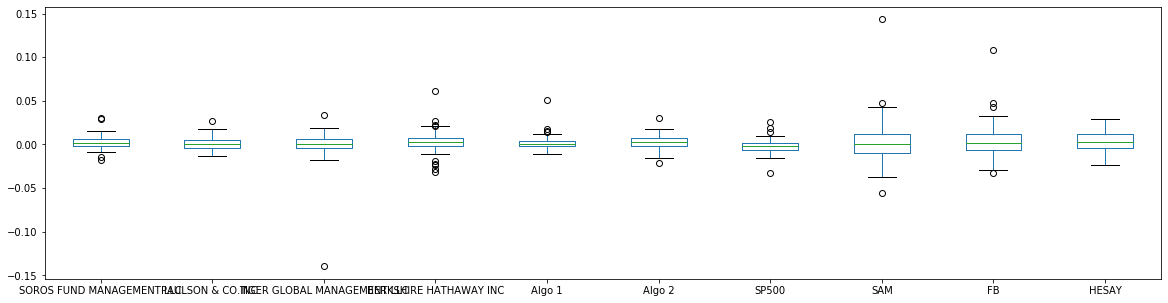

In [58]:
# Risk
all_stocks_combined_df.plot.box(figsize=(20,5))

all_portfolio_std = all_stocks_combined_df.std()
all_portfolio_std

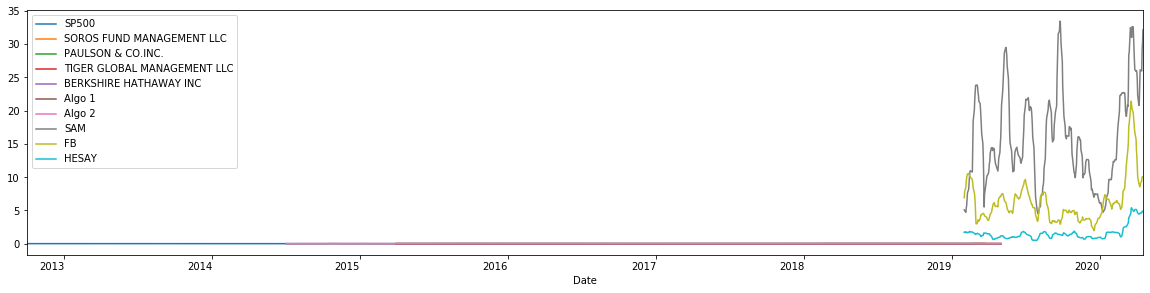

In [59]:
# Rolling
ax = sp500_daily_renamed.rolling(window=21).std().plot()
whale_df.rolling(window=21).std().plot(figsize=(20,5), ax = ax)
algo_df.rolling(window=21).std().plot(figsize=(20,5), ax = ax)
igw_df.rolling(window=21).std().plot(figsize=(20,5), ax = ax)

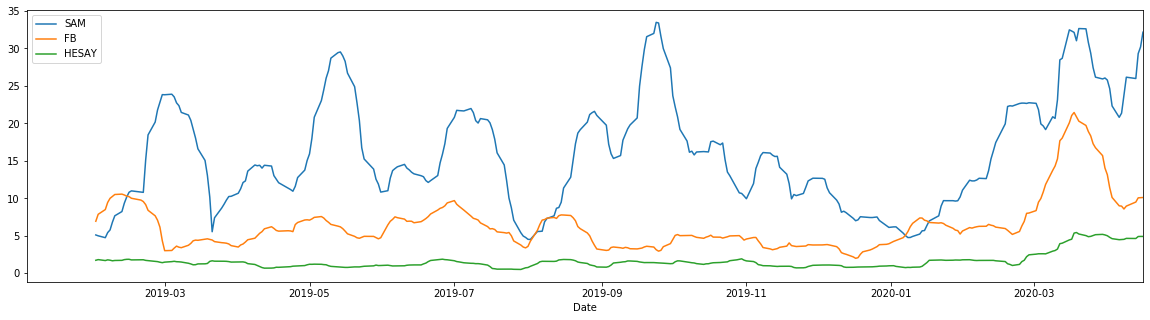

In [60]:
igw_df.rolling(window=21).std().plot(figsize=(20,5))

In [61]:
# Beta - first find covariance
covariance_hesay = all_stocks_combined_df['HESAY'].cov(all_stocks_combined_df['SP500'])
covariance_hesay

1.3691332770805516e-06

In [62]:
# Betan then find variance
variance_hesay = all_stocks_combined_df['HESAY'].var()
variance_hesay

0.00012856806832312482

In [63]:
# Beta is covariance / variance
beta_hesay = covariance_hesay / variance_hesay
beta_hesay

0.010649092694148328

In [64]:
# Annualzied Sharpe Ratios
igw_sharpe_ratios = (igw_dailyreturn.mean() * 252) / (igw_dailyreturn.std() * np.sqrt(252))
igw_sharpe_ratios

SAM      1.170605
FB       0.736828
HESAY    0.916314
dtype: float64

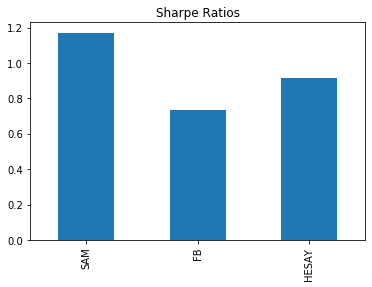

In [65]:
# Visualize the sharpe ratios as a bar plot
igw_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [66]:
# YOUR CODE HERE
all_correlation = all_stocks_combined_df.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,SAM,FB,HESAY
SOROS FUND MANAGEMENT LLC,1.000000,0.741346,0.356921,0.735196,0.102059,0.796459,0.141597,0.103545,0.537436,0.412875
PAULSON & CO.INC.,0.741346,1.000000,0.272005,0.589855,0.262871,0.751765,0.088304,0.082504,0.331475,0.389610
TIGER GLOBAL MANAGEMENT LLC,0.356921,0.272005,1.000000,0.129753,0.050928,0.201328,0.032677,0.073793,0.146758,0.078186
BERKSHIRE HATHAWAY INC,0.735196,0.589855,0.129753,1.000000,0.083139,0.745679,0.133585,0.065226,0.562095,0.575271
Algo 1,0.102059,0.262871,0.050928,0.083139,1.000000,0.238575,0.091317,0.091815,0.043370,-0.066220
Algo 2,0.796459,0.751765,0.201328,0.745679,0.238575,1.000000,0.144413,0.065721,0.353758,0.534933
SP500,0.141597,0.088304,0.032677,0.133585,0.091317,0.144413,1.000000,0.017288,0.105327,0.016723
SAM,0.103545,0.082504,0.073793,0.065226,0.091815,0.065721,0.017288,1.000000,0.014351,0.056880
FB,0.537436,0.331475,0.146758,0.562095,0.043370,0.353758,0.105327,0.014351,1.000000,0.332925
HESAY,0.412875,0.389610,0.078186,0.575271,-0.066220,0.534933,0.016723,0.056880,0.332925,1.000000
